## Import Libraries

In [23]:
import pathlib
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Import Dataset

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00459/avila.zip
!unzip avila.zip

--2020-07-15 18:09:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/00459/avila.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 584600 (571K) [application/x-httpd-php]
Saving to: ‘avila.zip’

avila.zip           100%[===================>] 570.90K   690KB/s    in 0.8s    

2020-07-15 18:09:50 (690 KB/s) - ‘avila.zip’ saved [584600/584600]

Archive:  avila.zip
   creating: avila/
  inflating: avila/avila-tr.txt      
  inflating: avila/avila-ts.txt      
  inflating: avila/avila-description.txt  


In [3]:
columns_names=['intercolumnar_distance','upper_margin','lower_margin','exploitation','row_number','modular',\
               'interlinear_spacing','weight','peak_number','modular_ratio','class']
  

dataset = pd.read_csv('avila/avila-ts.txt',names=columns_names,na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

dataset

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular,interlinear_spacing,weight,peak_number,modular_ratio,class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


## Data Processing

In [4]:
y=dataset[['class']]
dataset=dataset.drop(columns=['class'])
X=dataset

## Convert Categorical Columns into Numercial

In [5]:
ordinalencoder = OrdinalEncoder()
ordinalencoder.fit(y)
y = ordinalencoder.transform(y)
y=y.flatten()
y


array([9., 0., 8., ..., 0., 5., 7.])

## Split Datat

In [10]:
X_train, X_val, y_train, y_val = train_test_split(dataset, y, test_size=0.05, random_state=42)

## Model Implementation

In [11]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Predict Output

In [12]:
prediction=model.predict(X_val)
print(classification_report(prediction,y_val))

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       244
         2.0       1.00      0.80      0.89         5
         3.0       1.00      1.00      1.00        20
         4.0       0.93      0.96      0.95        56
         5.0       0.70      0.85      0.77        84
         6.0       0.71      0.67      0.69        15
         7.0       0.95      0.87      0.91        23
         8.0       1.00      1.00      1.00        36
         9.0       1.00      1.00      1.00         3
        10.0       1.00      1.00      1.00        24
        11.0       1.00      1.00      1.00        12

    accuracy                           0.89       522
   macro avg       0.93      0.91      0.92       522
weighted avg       0.90      0.89      0.89       522



## Feature Importance  

[Text(0, 0.5, 'Importance'), Text(0.5, 0, 'Columns')]

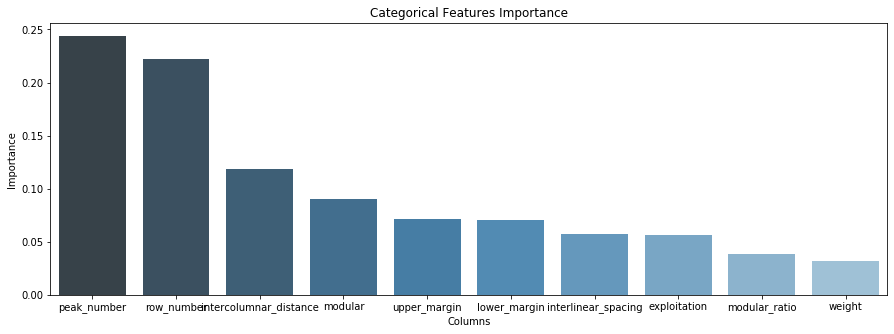

In [22]:
indices = np.argsort(model.feature_importances_)[::-1]

features = []
for i in range(10):
    features.append(X.columns[indices[i]])

fig, ax = plt.subplots(figsize=(15,5))     

sns.barplot(x=features, y=model.feature_importances_[indices[range(10)]],\
label="Importtant Categorical Features", palette=("Blues_d"),ax=ax).\
set_title('Categorical Features Importance')

ax.set(xlabel="Columns", ylabel = "Importance")

## Model Implementation with Selected Features 

In [14]:
X_new=X[['intercolumnar_distance','upper_margin','lower_margin','exploitation','row_number','modular',\
               'interlinear_spacing','peak_number']]

In [15]:
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_new, y, test_size=0.05, random_state=42)

In [16]:
model_sel_features = XGBClassifier()
model_sel_features.fit(X_train_new, y_train_new)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [17]:
prediction=model_sel_features.predict(X_val_new)
print(classification_report(prediction,y_val_new))

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       239
         2.0       1.00      0.80      0.89         5
         3.0       1.00      1.00      1.00        20
         4.0       0.95      0.95      0.95        58
         5.0       0.72      0.84      0.78        87
         6.0       0.71      0.67      0.69        15
         7.0       0.95      0.87      0.91        23
         8.0       1.00      1.00      1.00        36
         9.0       1.00      1.00      1.00         3
        10.0       1.00      1.00      1.00        24
        11.0       1.00      1.00      1.00        12

    accuracy                           0.90       522
   macro avg       0.93      0.91      0.92       522
weighted avg       0.90      0.90      0.90       522

